In [8]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_used: float
    total_usd: float
    target_currency: Literal["INR", "EUR"]
    total: float

In [9]:
def calc_total(state: PortfolioState) -> dict:
    return {
        "total_usd": state["amount_used"] * 1.08,
        "target_currency": state["target_currency"],  # passthrough
    }

def convert_to_inr(state: PortfolioState) -> dict:
    return {"total": state["total_usd"] * 85}

def convert_to_eur(state: PortfolioState) -> dict:
    return {"total": state["total_usd"] * 0.92}

def choose_conversion(state: PortfolioState) -> str:
    return state["target_currency"]

In [10]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total", calc_total)
builder.add_node("convert_to_inr", convert_to_inr)
builder.add_node("convert_to_eur", convert_to_eur)

builder.add_edge(START, "calc_total")

builder.add_conditional_edges(
    "calc_total",
    choose_conversion,
    {
        "INR": "convert_to_inr",
        "EUR": "convert_to_eur",
    }
)

builder.add_edge(["convert_to_inr", "convert_to_eur"], END)

graph = builder.compile()


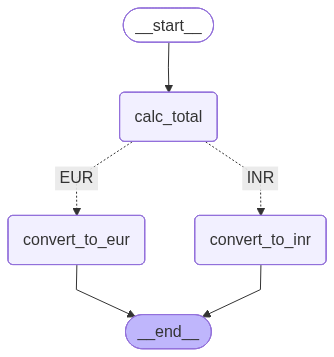

In [11]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke({"amount_used": 1000.0, "target_currency": "INR"})

{'amount_used': 1000.0,
 'total_usd': 1080.0,
 'target_currency': 'INR',
 'total': 91800.0}